In [181]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix

In [182]:
import pandas as pd

df = pd.read_csv("/content/Hotel_Reservations_.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN27080,2,0,0,2,NaN,0,Room_Type 1,102,2017,10,16,Offline,0,0,0,109.00,0,Not_Canceled
36281,INN29146,2,0,1,1,NaN,0,Room_Type 1,99,2018,8,29,Online,0,0,0,107.10,0,Canceled
36282,INN05926,1,0,0,1,NaN,0,Room_Type 1,0,2018,2,16,Online,0,0,0,85.00,0,Not_Canceled
36283,INN17356,2,1,2,4,NaN,0,Room_Type 1,47,2018,8,20,Online,0,0,0,129.99,1,Not_Canceled


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36285 non-null  object 
 1   no_of_adults                          36285 non-null  int64  
 2   no_of_children                        36285 non-null  int64  
 3   no_of_weekend_nights                  36285 non-null  int64  
 4   no_of_week_nights                     36285 non-null  int64  
 5   type_of_meal_plan                     36245 non-null  object 
 6   required_car_parking_space            36285 non-null  int64  
 7   room_type_reserved                    36260 non-null  object 
 8   lead_time                             36285 non-null  int64  
 9   arrival_year                          36285 non-null  int64  
 10  arrival_month                         36285 non-null  int64  
 11  arrival_date   

In [184]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,40
required_car_parking_space,0
room_type_reserved,25
lead_time,0
arrival_year,0


In [185]:
# تشوف إذا فيه أي دبل كيت
print(df.duplicated().any())

# عدد الدبلكيت
print(df.duplicated().sum())

True
10


In [186]:
# drop_duplicates

df.drop_duplicates(inplace=True)

print("✅ بعد حذف الـ Duplicates شكل الداتا:", df.shape)

✅ بعد حذف الـ Duplicates شكل الداتا: (36275, 19)


In [187]:
# تشوف إذا فيه أي دبل كيت
print(df.duplicated().any())

# عدد الدبلكيت
print(df.duplicated().sum())

False
0


In [188]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36255.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.424691,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.093582,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [189]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [190]:
#fillna with mode at categorical_columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ DataFrame after imputing missing values with mode:")
print(df.isnull().sum())

✅ DataFrame after imputing missing values with mode:
Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                      20
no_of_special_requests                   0
booking_status                           0
dtype: int64


In [191]:
#fillna with mean at numerical_columns

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

print("✅ DataFrame after imputing missing values with mean:")
df.isnull().sum()

✅ DataFrame after imputing missing values with mean:


,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [192]:
categorical_columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [193]:
df[['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status']].head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled


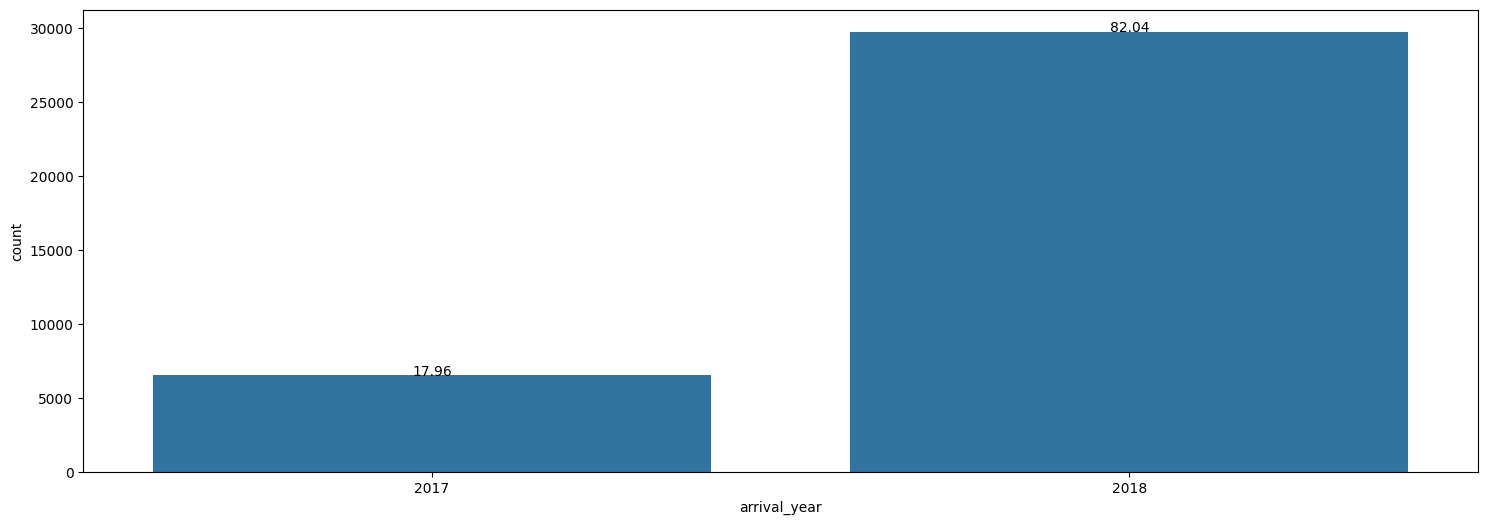

In [194]:
plt.figure(figsize=(18,6))
total = float(len(df) )
a = sns.countplot(x="arrival_year", data=df)#target
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

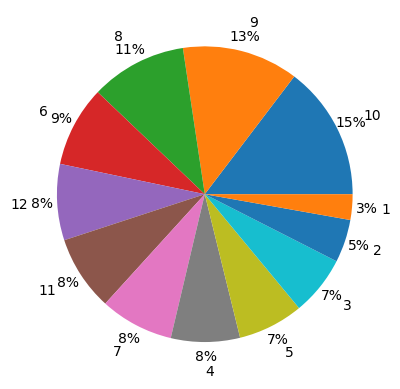

In [195]:
plt.pie(df['arrival_month'].value_counts(), labels=df['arrival_month'].value_counts().index, autopct='%.0f%%', labeldistance=1.2, pctdistance=1.1);

/tmp/ipython-input-3228484752.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="lead_time", y="booking_status", estimator=sum, ci=None)


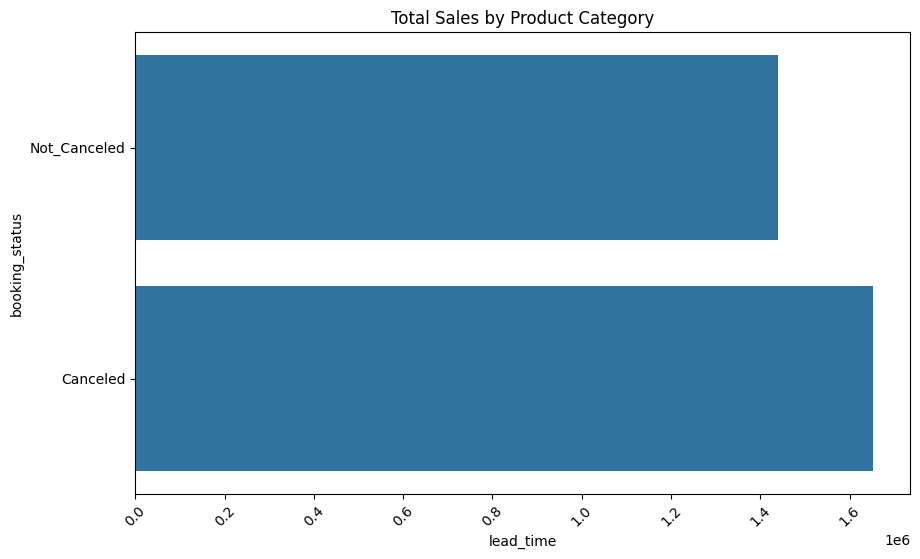

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="lead_time", y="booking_status", estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-747362597.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="repeated_guest", y="booking_status", estimator=sum, ci=None)


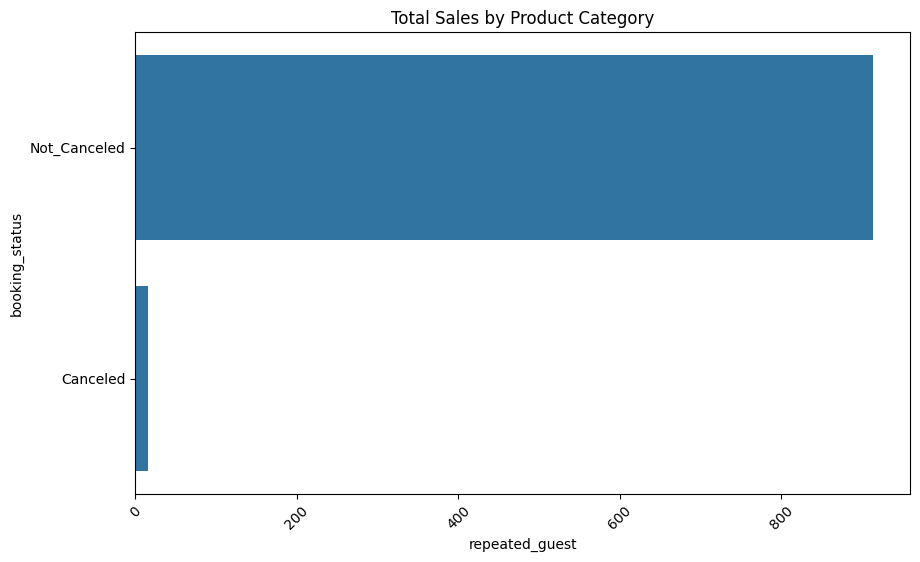

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="repeated_guest", y="booking_status", estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


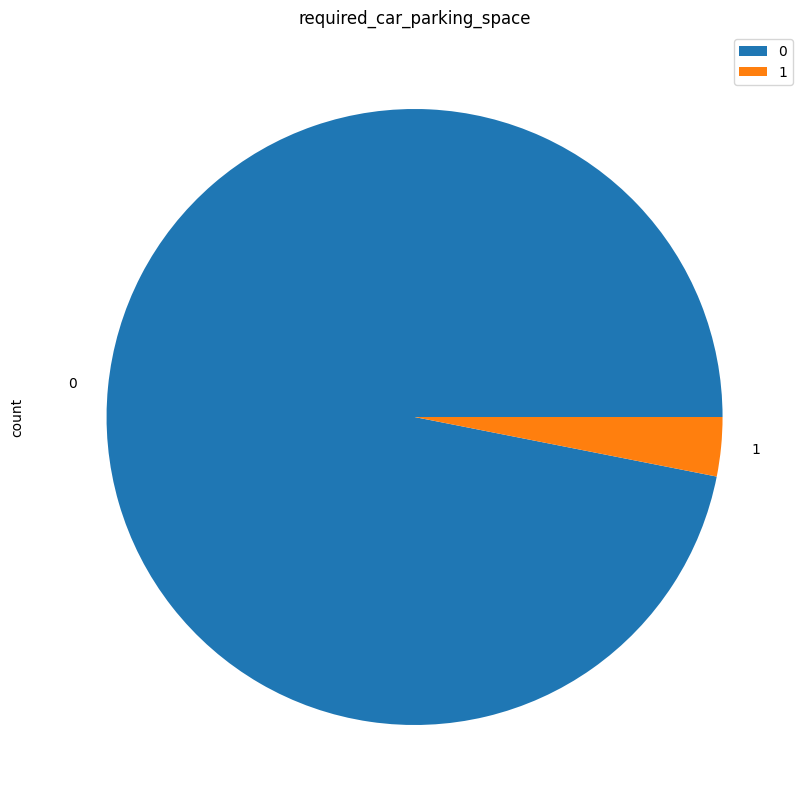

In [198]:
counts=df['required_car_parking_space'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='required_car_parking_space',figsize=(11,10))
plt.legend()
plt.show()

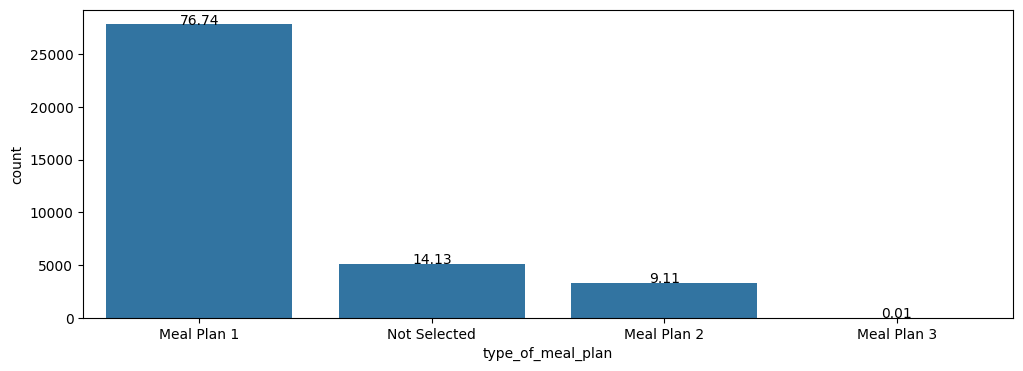

In [199]:
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="type_of_meal_plan", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

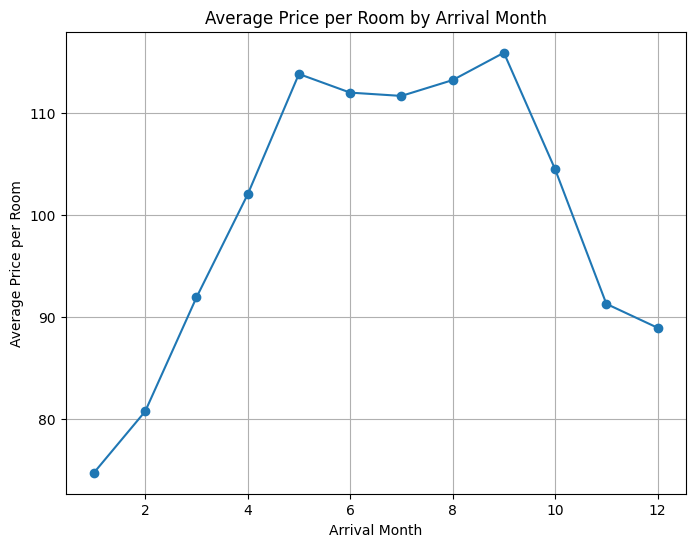

In [200]:
monthly_avg = df.groupby("arrival_month")["avg_price_per_room"].mean()

plt.figure(figsize=(8,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average Price per Room by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Average Price per Room")
plt.grid(True)
plt.show()

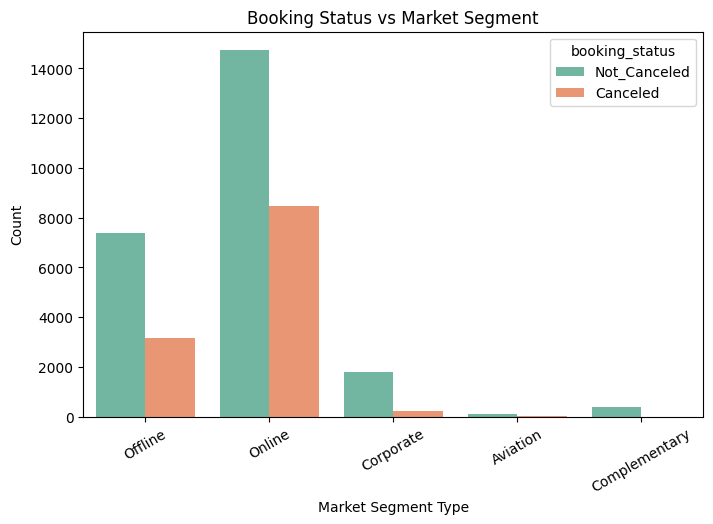

In [201]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="market_segment_type", hue="booking_status", palette="Set2")
plt.title("Booking Status vs Market Segment")
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

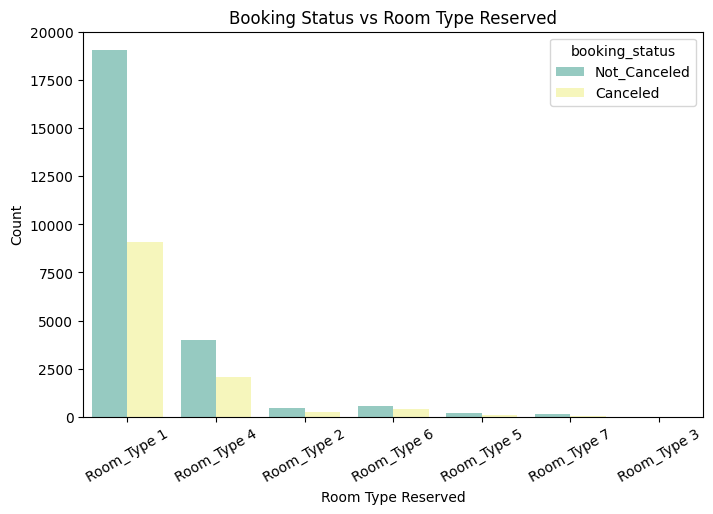

In [202]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="room_type_reserved", hue="booking_status", palette="Set3")
plt.title("Booking Status vs Room Type Reserved")
plt.xlabel("Room Type Reserved")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

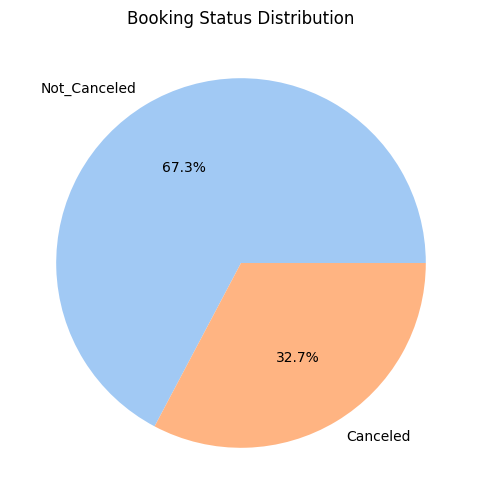

In [203]:
status_counts = df["booking_status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Booking Status Distribution")
plt.show()

In [204]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

print("\n✅ بعد تطبيق LabelEncoder:")
(df.head())


✅ بعد تطبيق LabelEncoder:


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


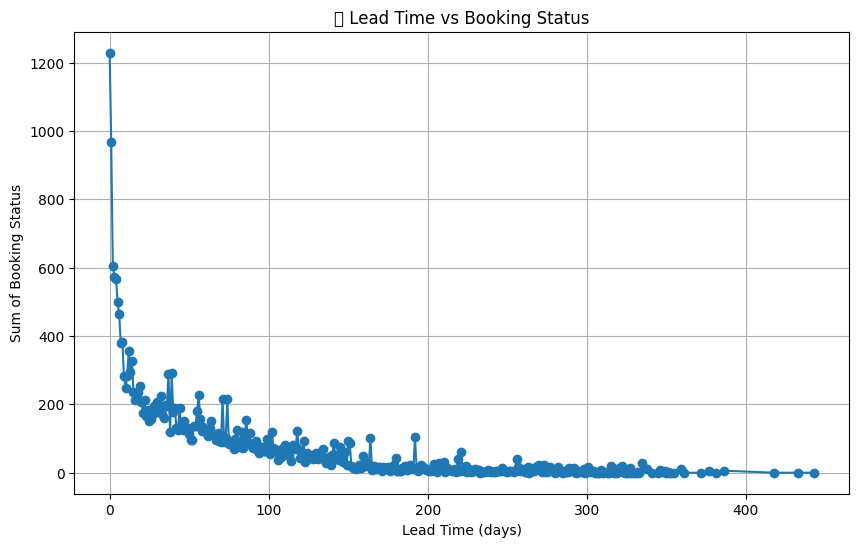

In [205]:
# import matplotlib.pyplot as plt

# Lead Time vs Booking Status (Line Plot)
plt.figure(figsize=(10, 6))
lead_status = df.groupby("lead_time")["booking_status"].sum()   # أو .mean() حسب المطلوب
plt.plot(lead_status.index, lead_status.values, marker="o", linestyle="-")
plt.title("⏳ Lead Time vs Booking Status")
plt.xlabel("Lead Time (days)")
plt.ylabel("Sum of Booking Status")
plt.grid(True)
plt.show()


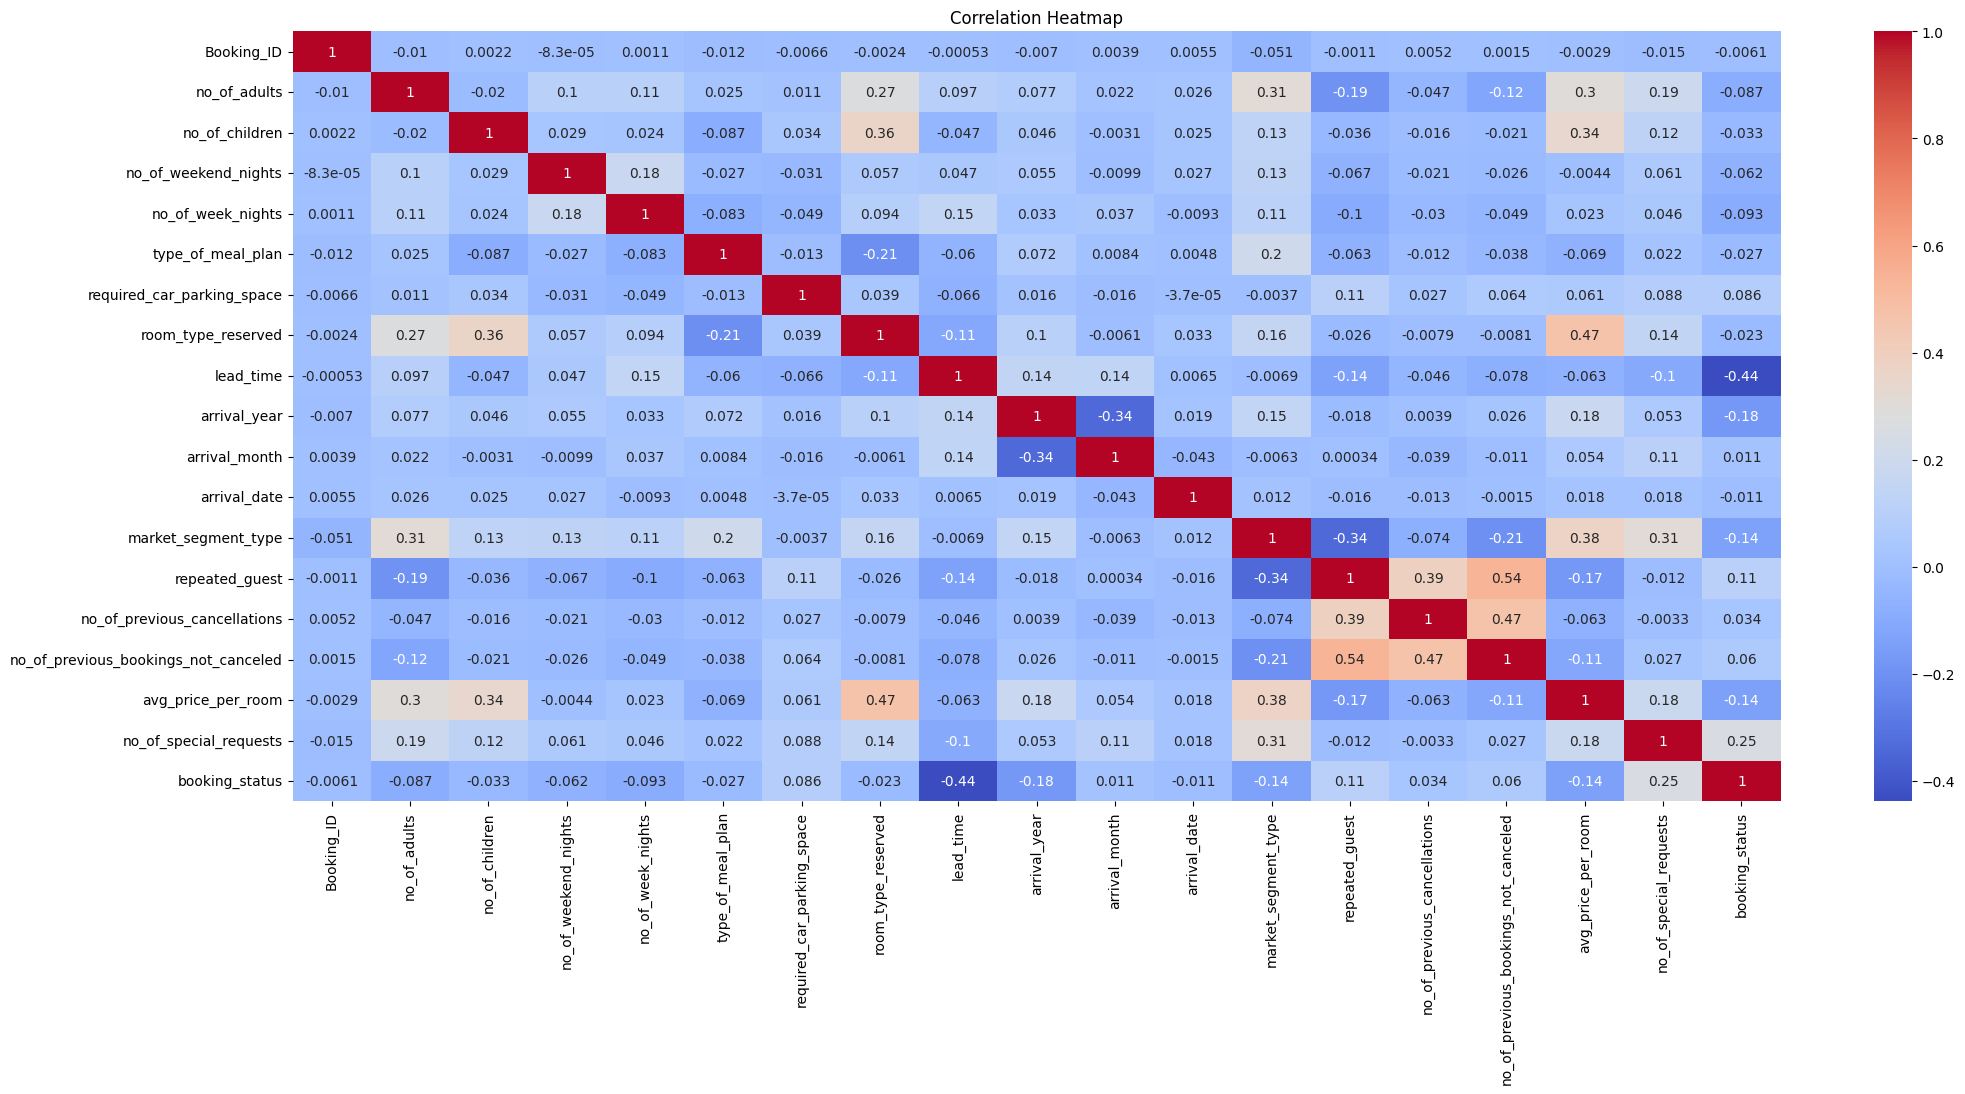

In [206]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

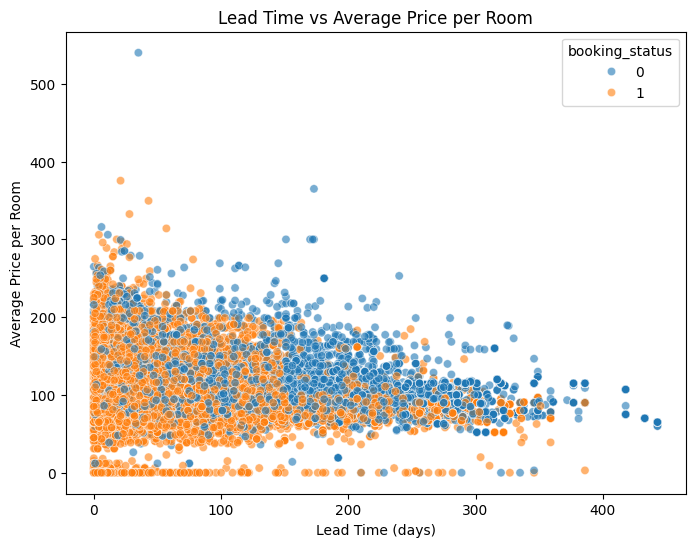

In [207]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", hue="booking_status", alpha=0.6)
plt.title("Lead Time vs Average Price per Room")
plt.xlabel("Lead Time (days)")
plt.ylabel("Average Price per Room")
plt.show()

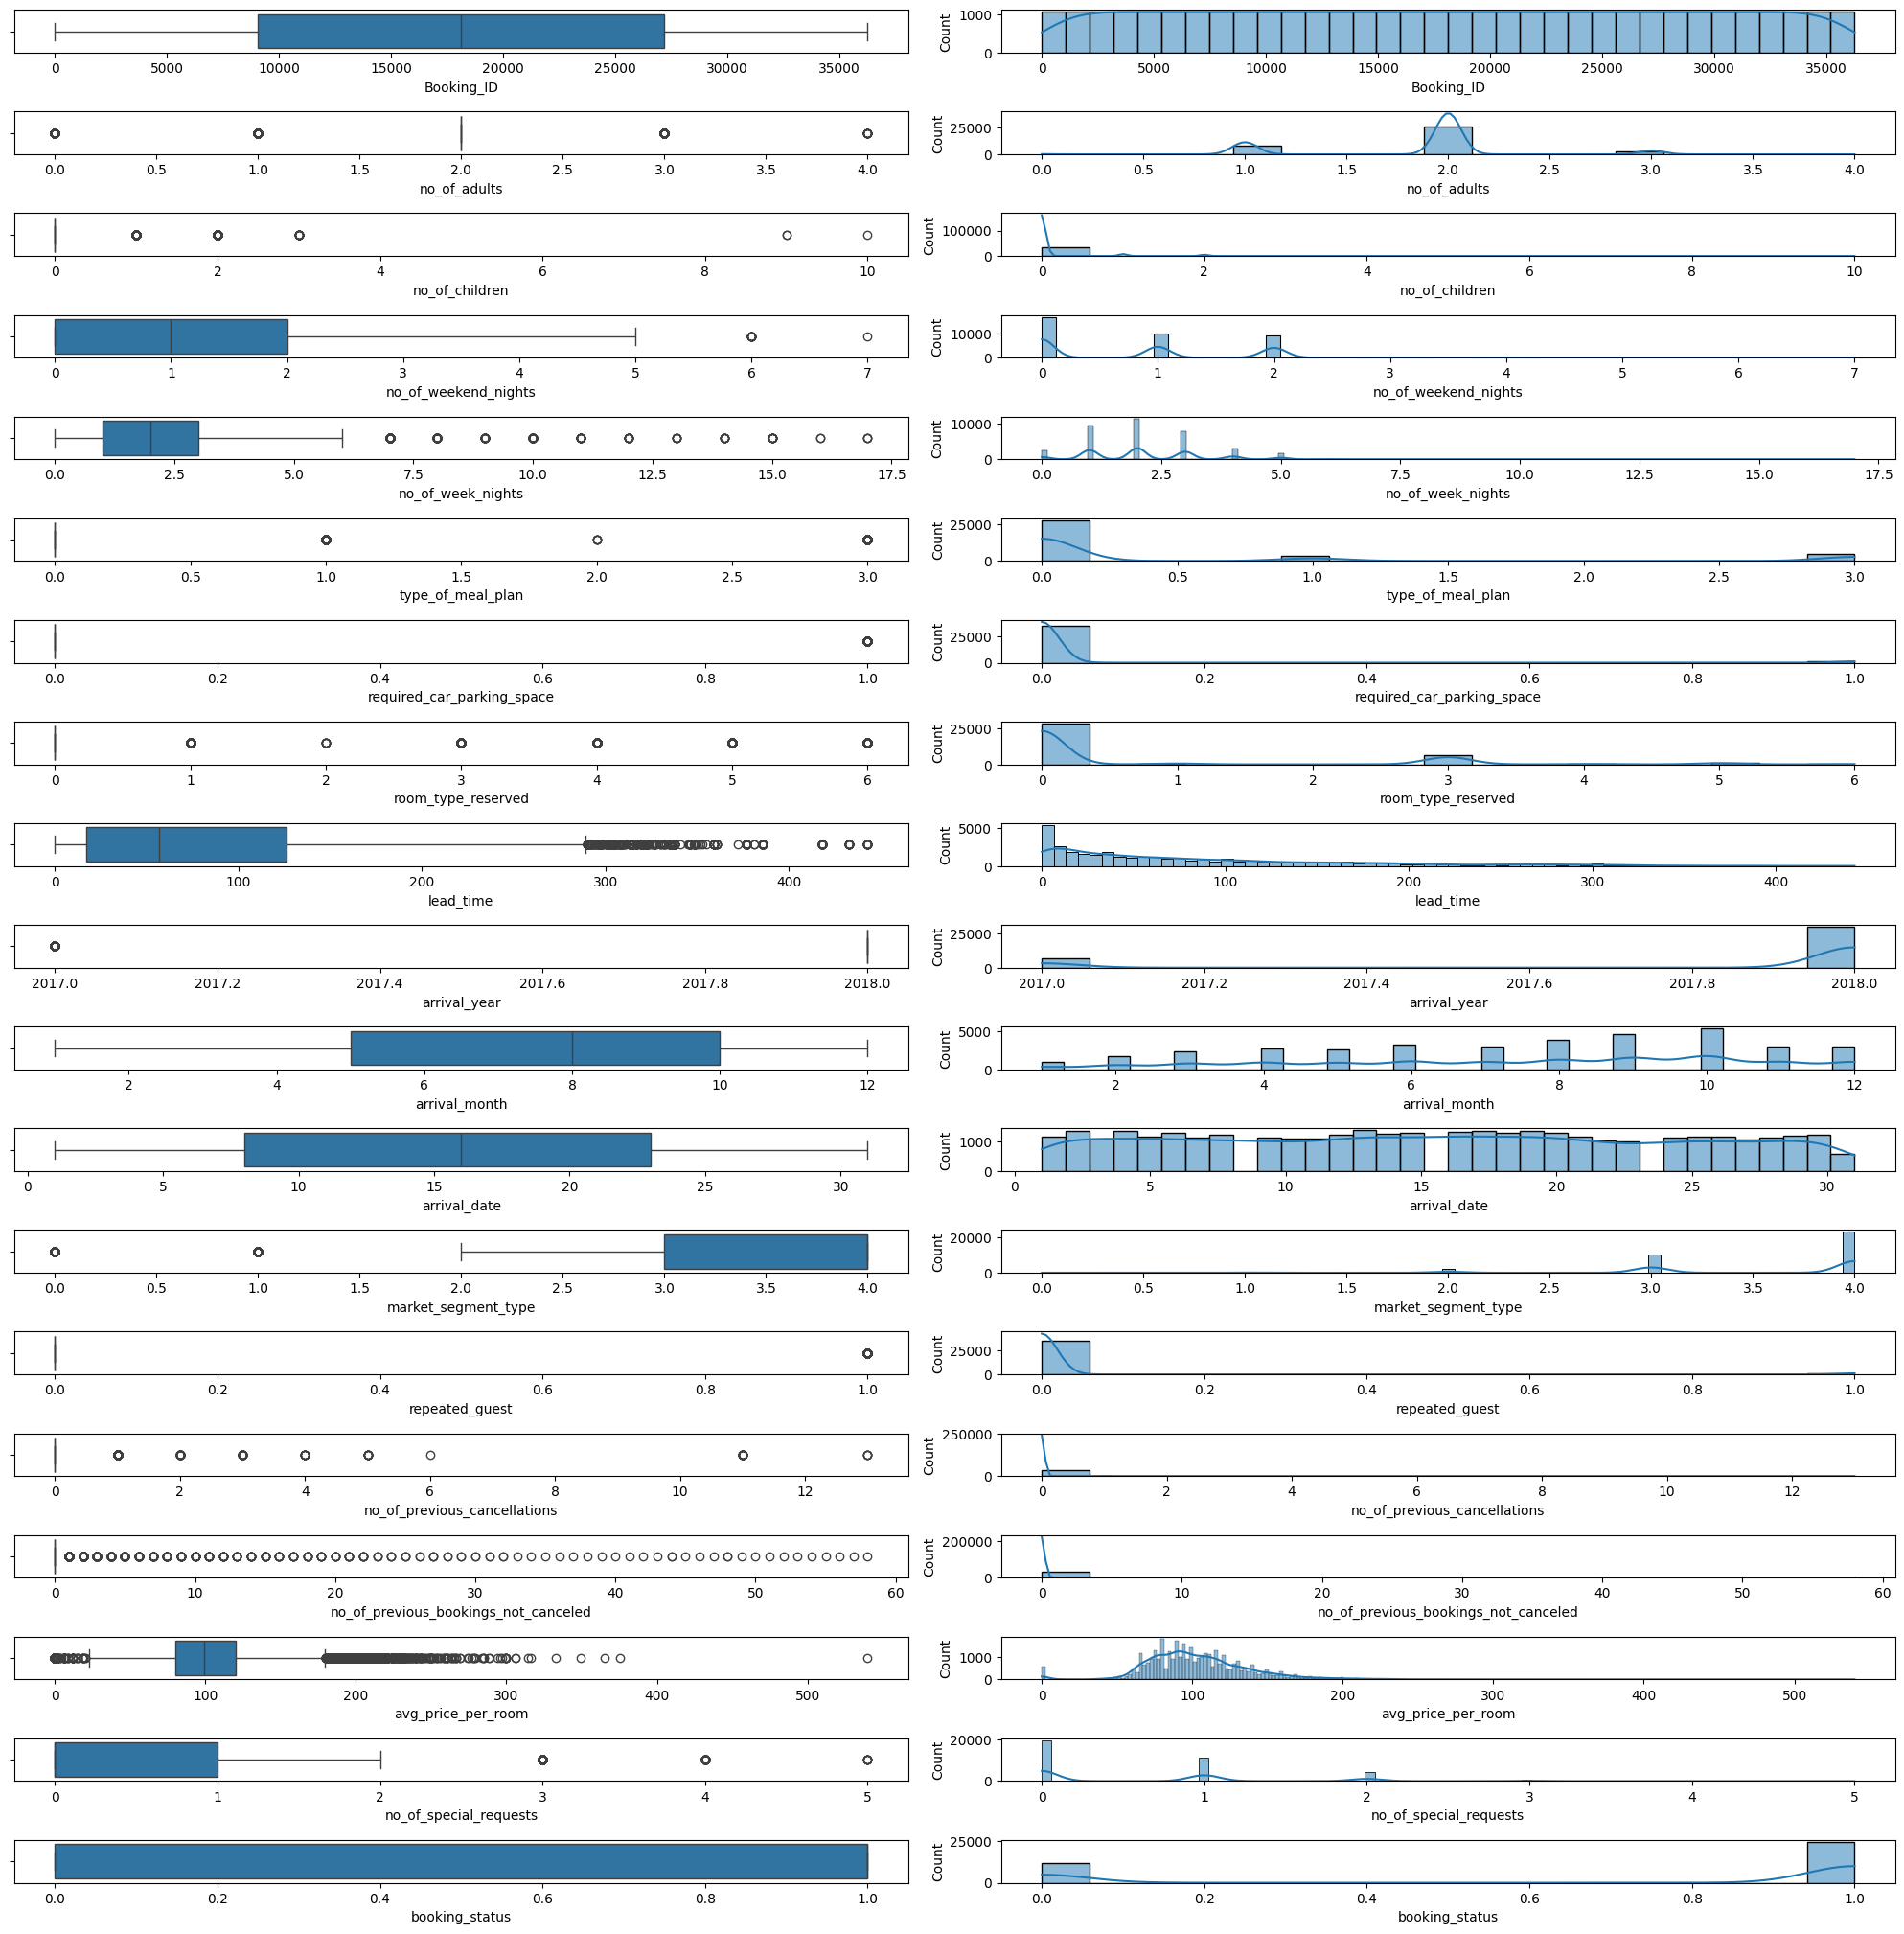

In [208]:
index = 0
numeric_cols = df.select_dtypes('number').columns
plt.figure(figsize=(20, 40))

for feature in numeric_cols:
    index += 1
    plt.subplot(len(numeric_cols) * 2, 2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(len(numeric_cols) * 2, 2, index)
    sns.histplot(x=feature, data=df, kde=True)

plt.tight_layout()
plt.show()

In [209]:
# نعمل نسخة جديدة
df_fixed = df.copy()

for col in numeric_cols:
    Q1 = df_fixed[col].quantile(0.25)
    Q3 = df_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # أي قيمة أقل من الحد الأدنى نخليها = lower_bound
    df_fixed[col] = df_fixed[col].apply(lambda x: lower_bound if x < lower_bound else x)

    # أي قيمة أكبر من الحد الأقصى نخليها = upper_bound
    df_fixed[col] = df_fixed[col].apply(lambda x: upper_bound if x > upper_bound else x)

print(" df_fixed", df_fixed.shape)


 df_fixed (36275, 19)


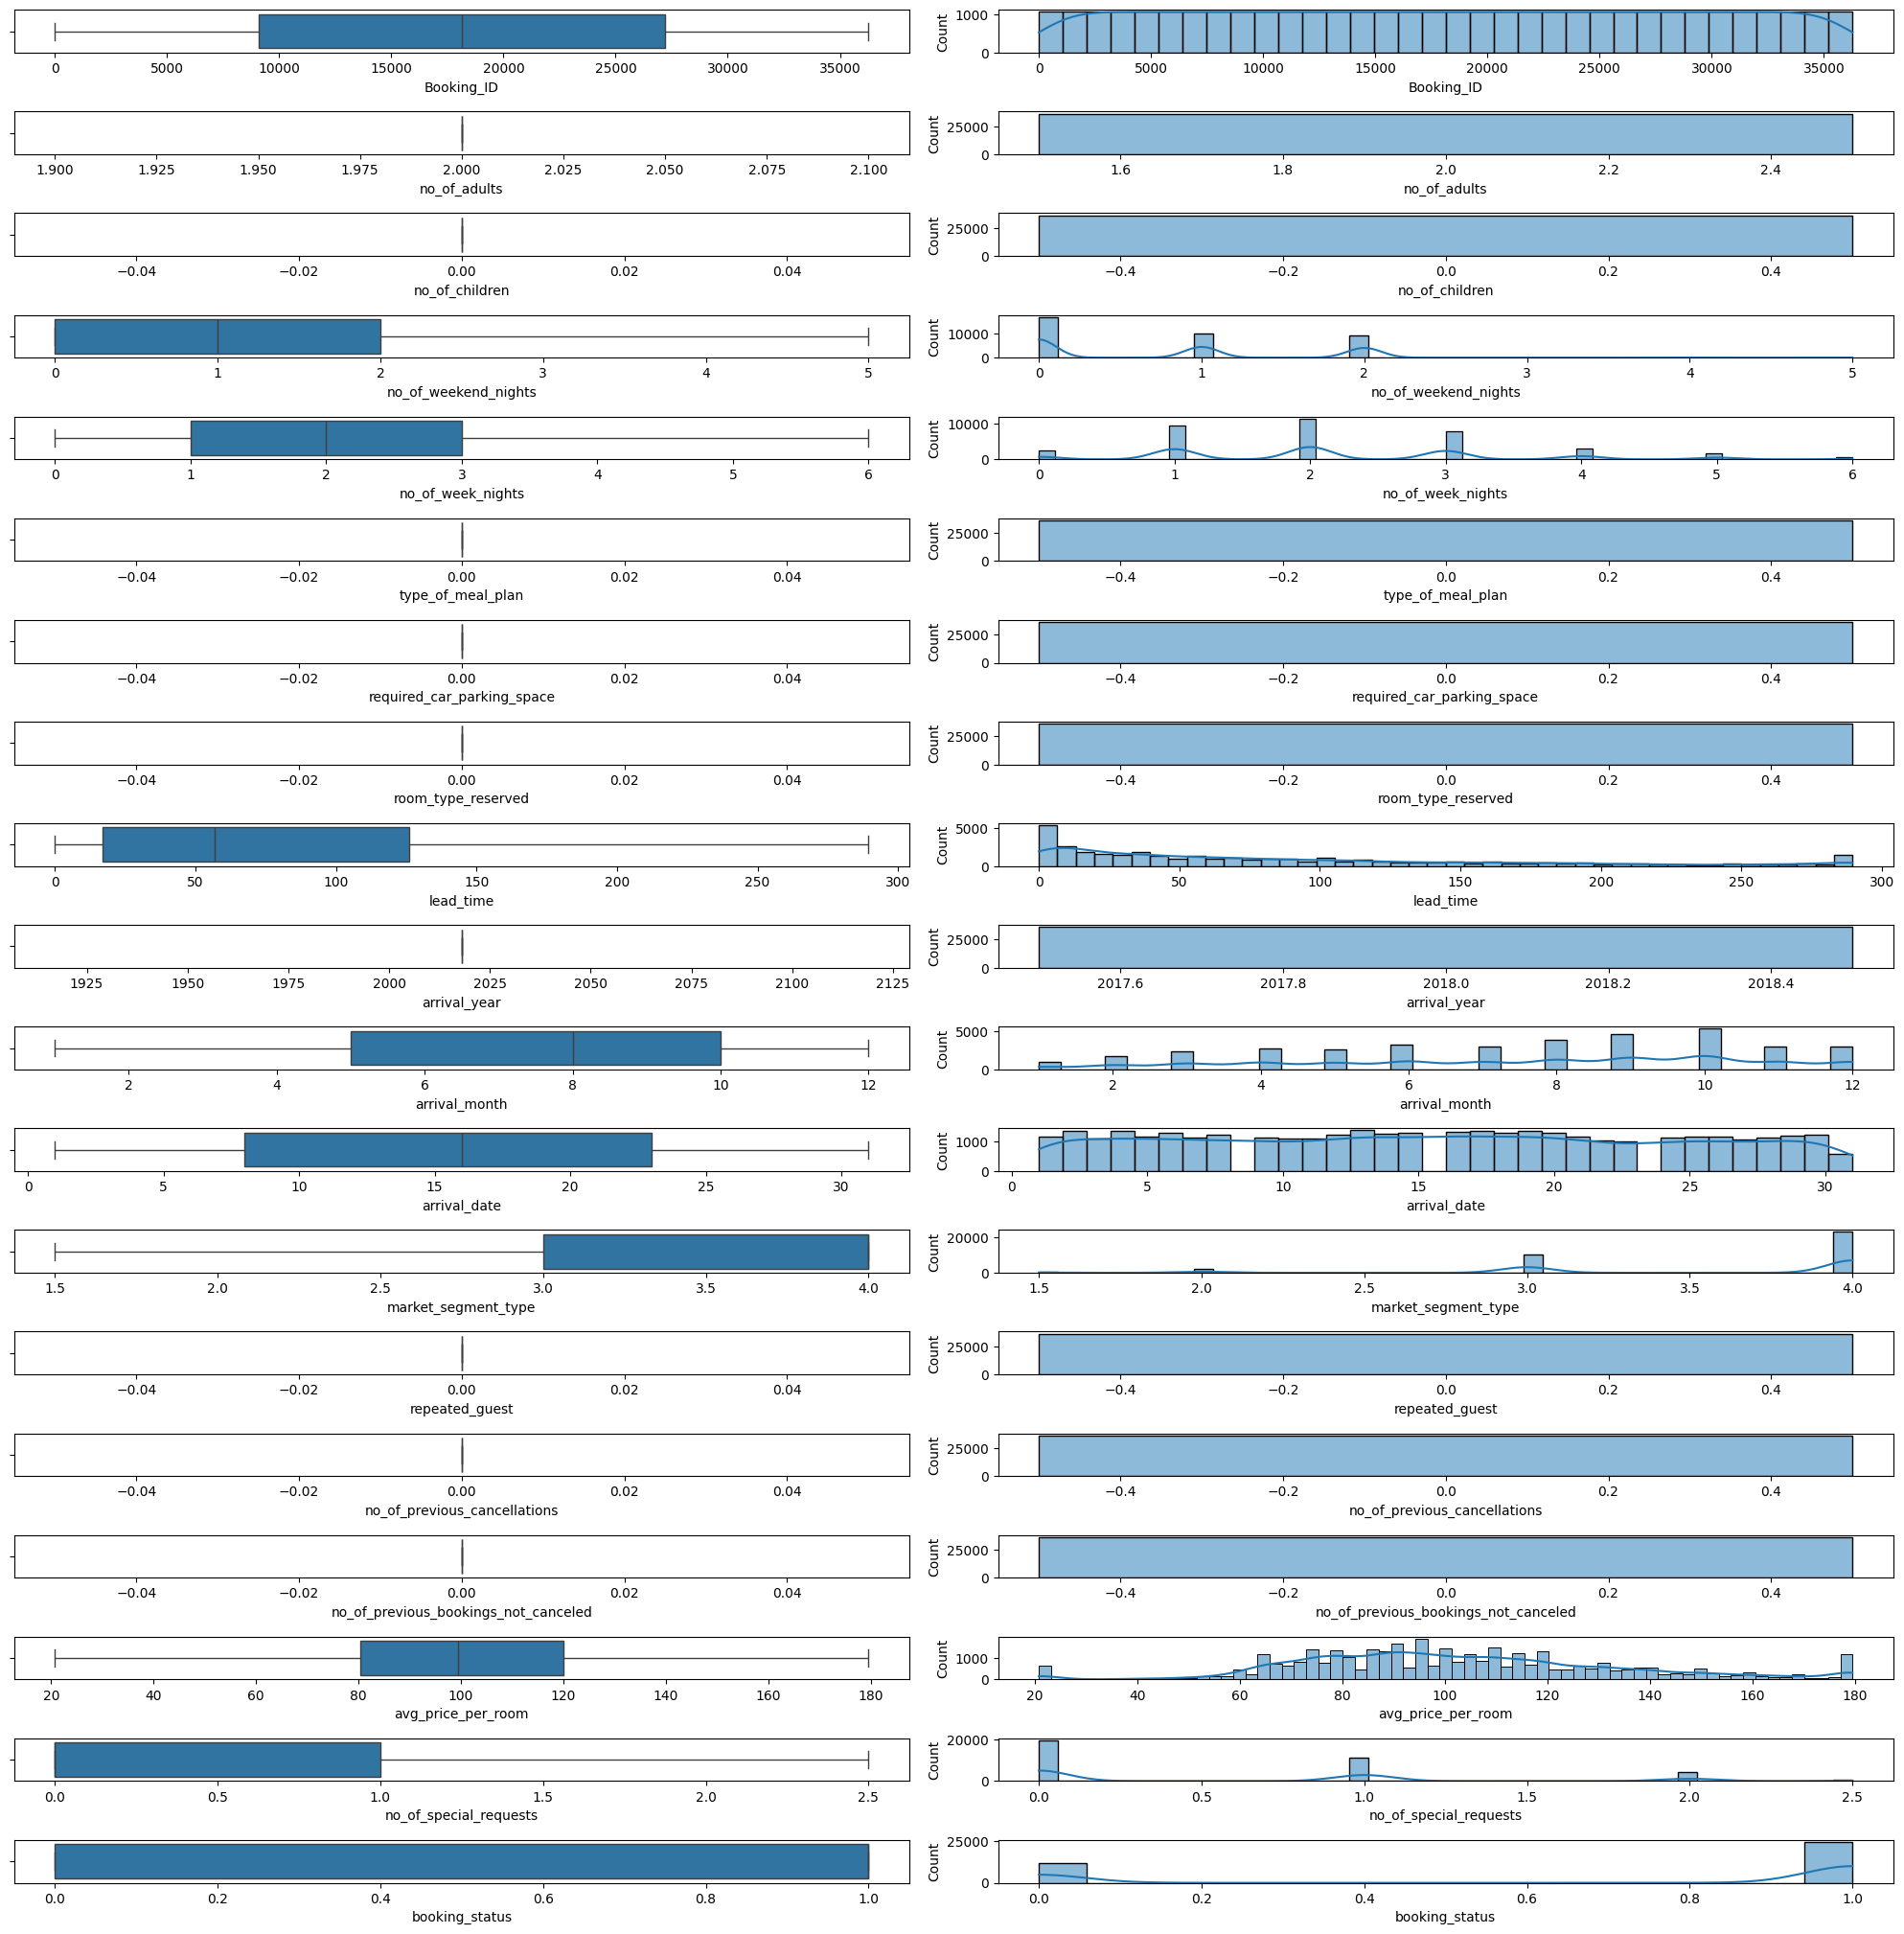

In [210]:
index = 0
numeric_cols =df_fixed.select_dtypes('number').columns
plt.figure(figsize=(20, 40))

for feature in numeric_cols:
    index += 1
    plt.subplot(len(numeric_cols) * 2, 2, index)
    sns.boxplot(x=feature, data=df_fixed, whis=1.5)
    index += 1
    plt.subplot(len(numeric_cols) * 2, 2, index)
    sns.histplot(x=feature, data=df_fixed, kde=True)

plt.tight_layout()
plt.show()

In [211]:
y = df["booking_status"]

X = df.drop(["Booking_ID", "booking_status"], axis=1)

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9021364576154376

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2376
           1       0.91      0.95      0.93      4879

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

Accuracy: 0.9021364576154376
